In [37]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
img = cv2.imread('./dataset/elon_musk/_124485204_tv075719297.jpg')
img.shape

(549, 976, 3)

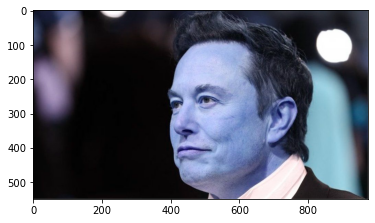

In [40]:
plt.imshow(img)

In [41]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(549, 976)

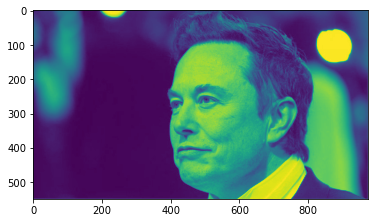

In [42]:
plt.imshow(gray)

In [43]:
gray

array([[116,  70,  74, ..., 123,  92, 157],
       [ 48,   2,   6, ...,  59,  28,  93],
       [ 75,  20,  32, ...,  94,  62, 128],
       ...,
       [ 67,  11,  21, ...,  25,  14,  68],
       [ 48,   0,   5, ...,   6,   1,  49],
       [108,  54,  67, ...,  69,  59, 114]], dtype=uint8)

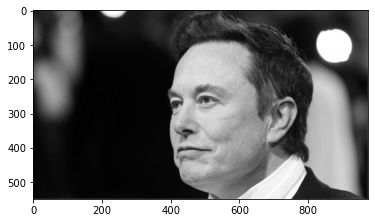

In [44]:
plt.imshow(gray, cmap='gray')

In [45]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[315, 142, 331, 331]], dtype=int32)

In [46]:
(x,y,w,h) = faces[0]
x,y,w,h

(315, 142, 331, 331)

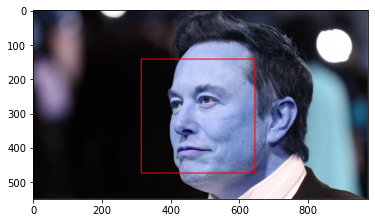

In [47]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

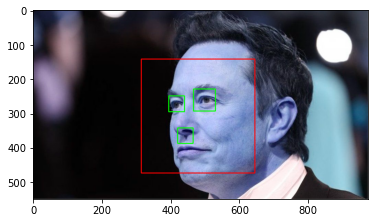

In [48]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

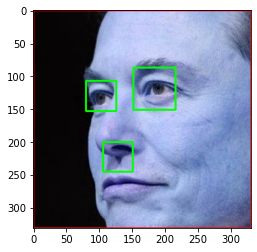

In [49]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [56]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

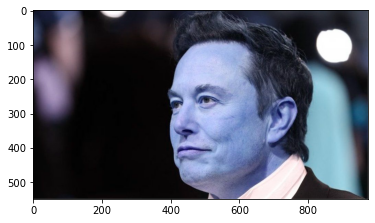

In [57]:
original_test_img = cv2.imread('./dataset/elon_musk/_124485204_tv075719297.jpg')
plt.imshow(original_test_img)

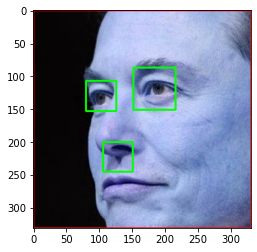

In [58]:
cropped_img = get_cropped_image_if_2_eyes('./dataset/elon_musk/_124485204_tv075719297.jpg')
plt.imshow(cropped_img)

In [60]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [61]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [62]:
img_dirs

['./dataset/elon_musk',
 './dataset/tom_brady',
 './dataset/steve_jobs',
 './dataset/lebron_james',
 './dataset/cropped']

In [63]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [64]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/elon_musk


error: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'
